In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..\..\.vscode\posco_analysis'))
	print(os.getcwd())
except:
	pass


In [281]:
#다중회귀분석
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 
import statsmodels.api as sm
from sklearn.preprocessing import scale,robust_scale,minmax_scale
#다중공정성 패키지
from statsmodels.stats.outliers_influence import variance_inflation_factor
#sklearn 선형회귀 모형 :변수선택법
from sklearn.linear_model import LinearRegression
#변수 선택법: 후진제거법
from sklearn.feature_selection import RFE
# 데이터 스케일
from sklearn.preprocessing import scale


In [282]:
# data import
df_diabete = pd.read_csv("data/DIABETEST.csv",engine='python')
df_diabete.head()


,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [283]:
#컬럼확인
df_diabete.columns


Index(['Y', 'AGE', 'GENDER', 'BMI', 'BP', 'CHOLESTEROL', 'LDL', 'HDL', 'TCH',
       'LTG', 'GLUCOSE'],
      dtype='object')

In [284]:
# 결측치 확인
df_diabete.isnull().sum()


Y              0
AGE            0
GENDER         0
BMI            0
BP             0
CHOLESTEROL    0
LDL            0
HDL            0
TCH            0
LTG            0
GLUCOSE        0
dtype: int64

In [285]:
#변수간 상관계수확인
df_diabete.corr().round(3)


,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
Y,1.000,0.188,0.043,0.586,0.441,0.212,0.174,-0.395,0.430,0.566,0.382
AGE,0.188,1.000,0.174,0.185,0.335,0.260,0.219,-0.075,0.204,0.271,0.302
GENDER,0.043,0.174,1.000,0.088,0.241,0.035,0.143,-0.379,0.332,0.150,0.208
BMI,0.586,0.185,0.088,1.000,0.395,0.250,0.261,-0.367,0.414,0.446,0.389
BP,0.441,0.335,0.241,0.395,1.000,0.242,0.186,-0.179,0.258,0.393,0.390
CHOLESTEROL,0.212,0.260,0.035,0.250,0.242,1.000,0.897,0.052,0.542,0.516,0.326
LDL,0.174,0.219,0.143,0.261,0.186,0.897,1.000,-0.196,0.660,0.318,0.291
HDL,-0.395,-0.075,-0.379,-0.367,-0.179,0.052,-0.196,1.000,-0.738,-0.399,-0.274
TCH,0.430,0.204,0.332,0.414,0.258,0.542,0.660,-0.738,1.000,0.618,0.417
LTG,0.566,0.271,0.150,0.446,0.393,0.516,0.318,-0.399,0.618,1.000,0.465


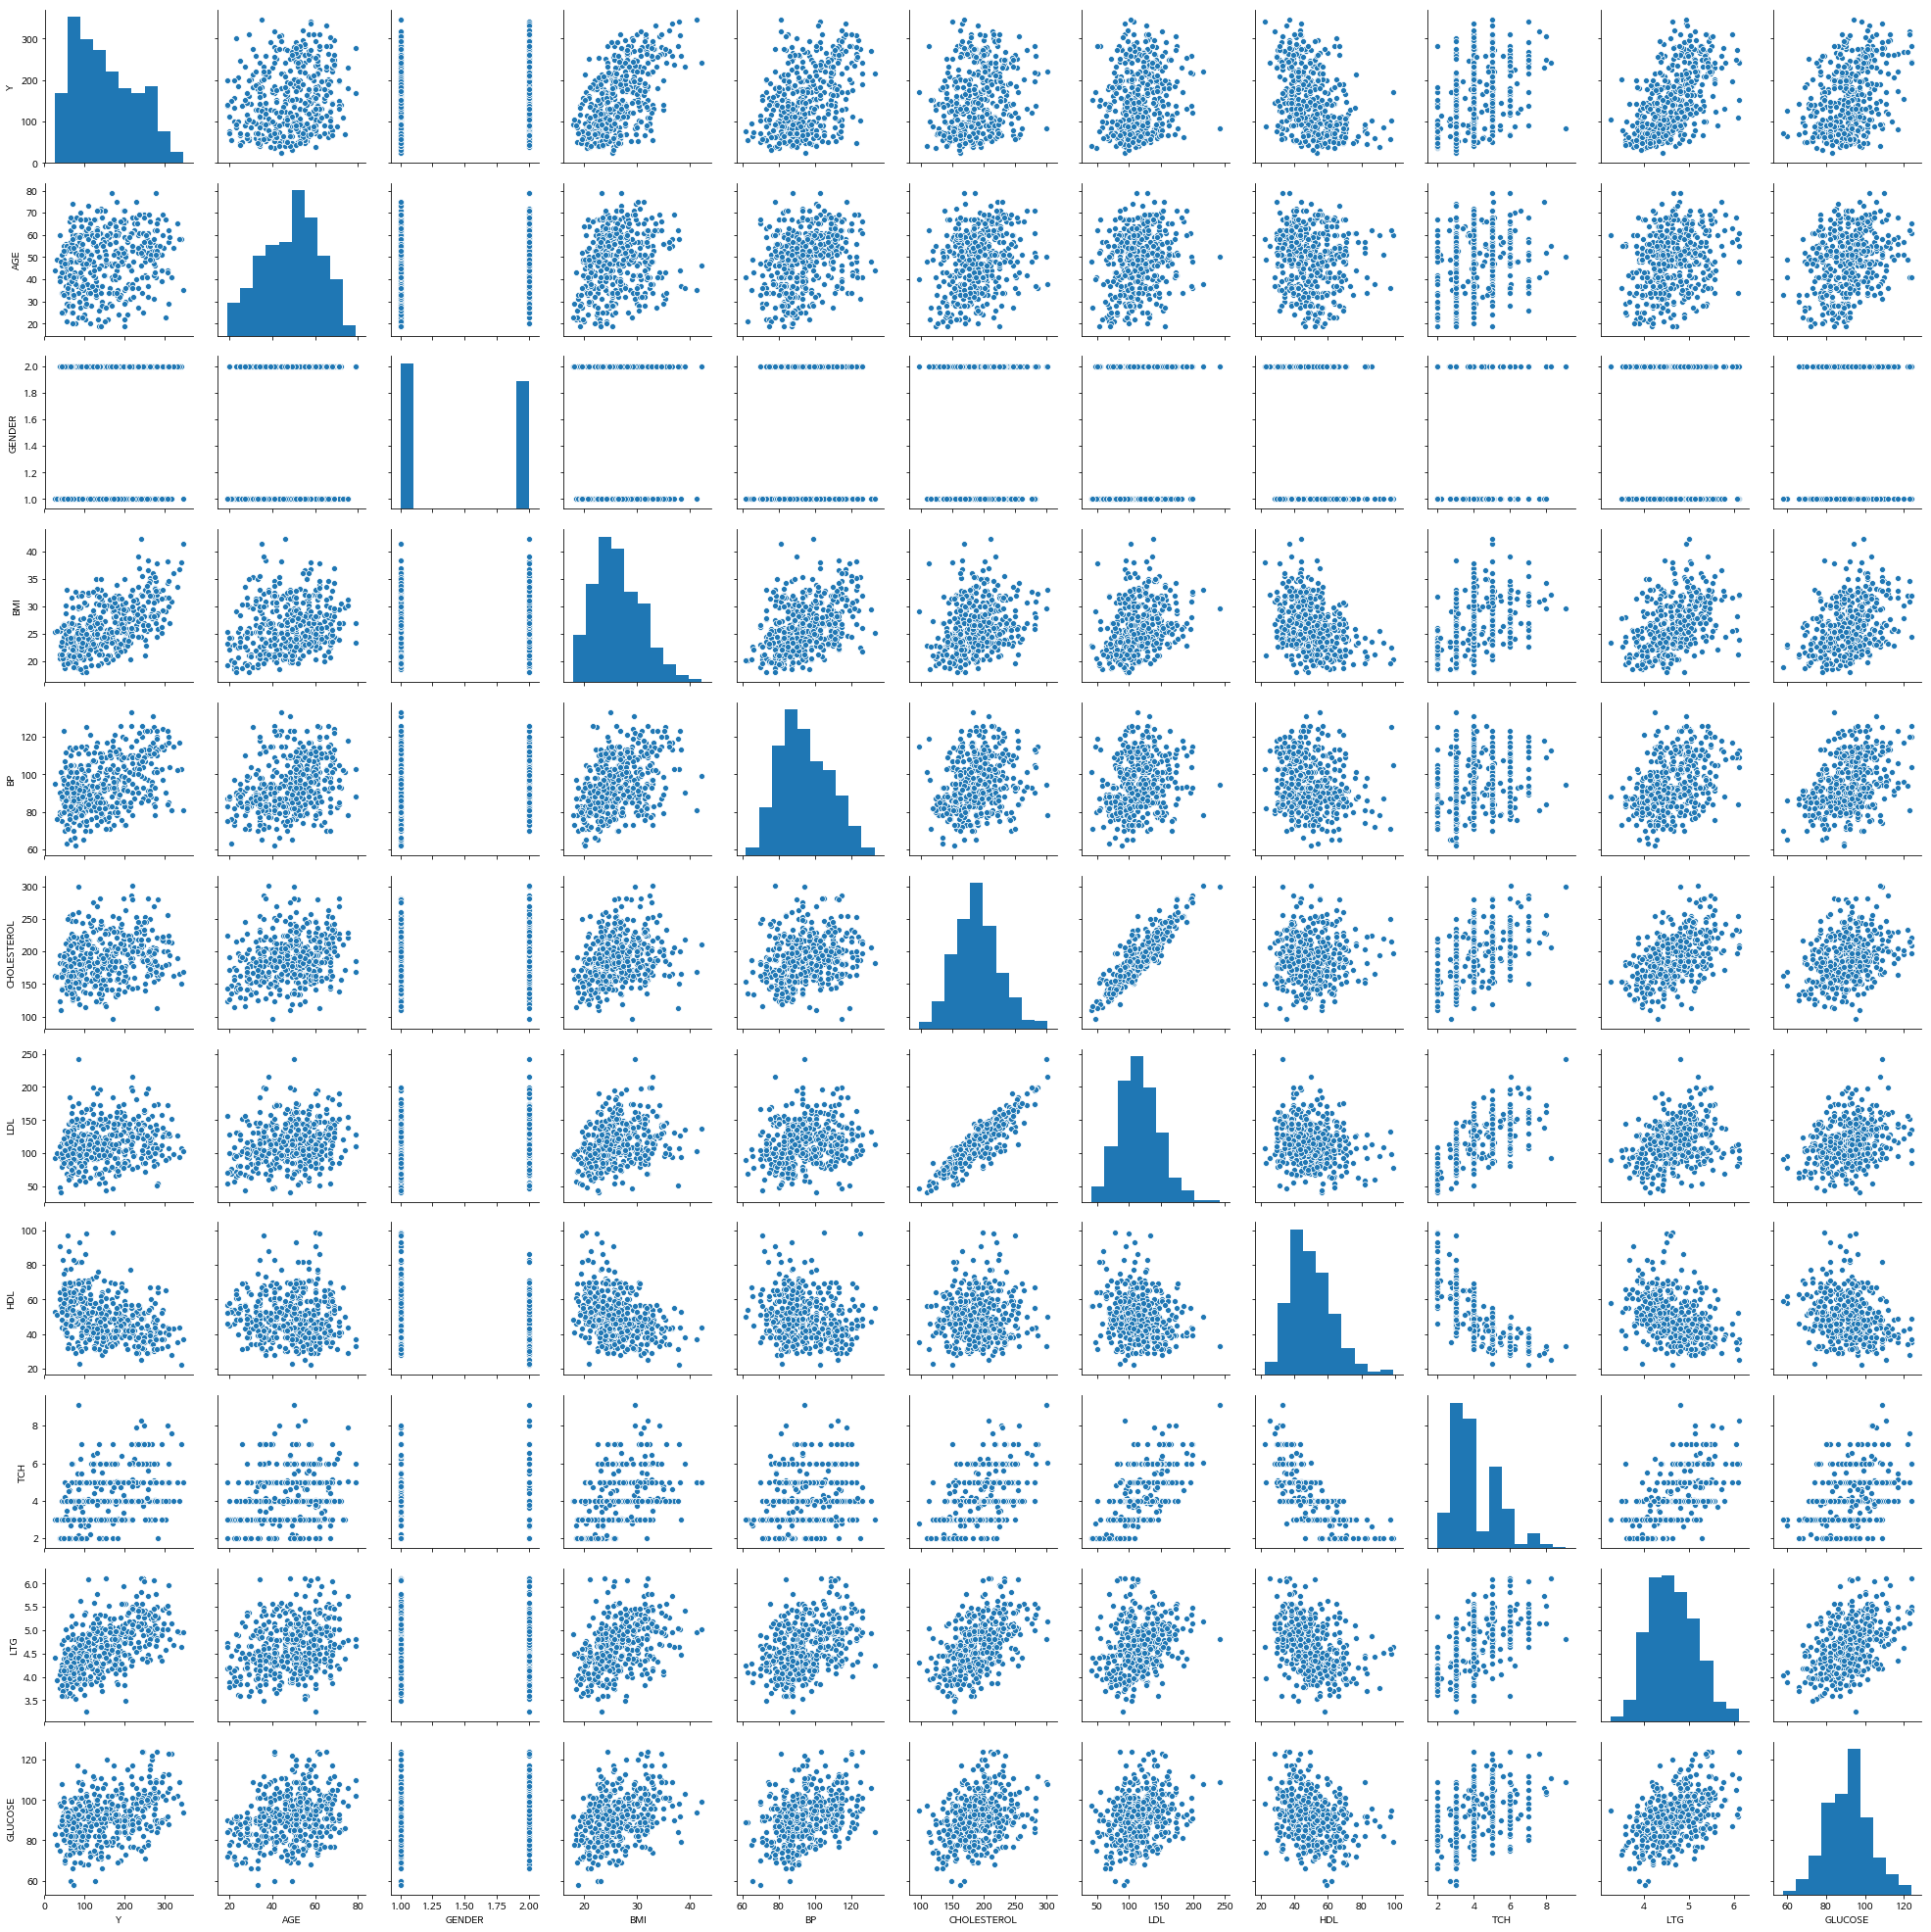

In [286]:
# 산포확인
sns.pairplot(df_diabete)



In [287]:
# 이상치확인(box_plot)
def draw_multivarient_plot(dataset, rows, cols, plot_type):
    column_names=dataset.columns.values
    number_of_column=len(column_names)
    fig, axarr=plt.subplots(rows,cols, figsize=(5*cols,5*rows))

    counter=0
    for i in range(rows):
        for j in range(cols):
            if 'violin' in plot_type:
                sns.violinplot(y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                sns.boxplot( y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot(y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(y=column_names[counter],data=dataset, ax=axarr[i][j])

            counter+=1
            if counter==(number_of_column-1,):
                break


In [288]:
def scatter_g(feature):
    sns.scatterplot(x = feature,y = "Y",data = df_diabete ,marker = 'x')  

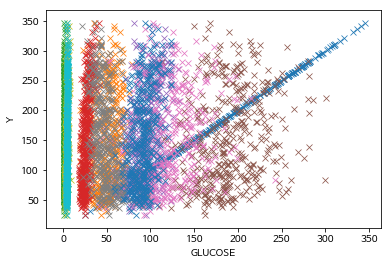

In [289]:
# BMI와 FAT간의 산포도 분석하기
for feature in df_diabete.columns:
    scatter_g(feature)


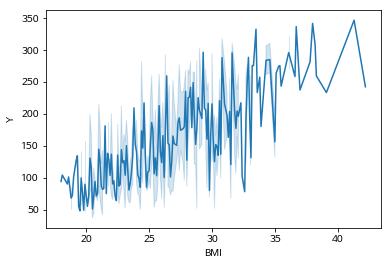

In [290]:
sns.lineplot(x=df_diabete["BMI"],y=df_diabete['Y'])


In [292]:
# 목표변수, 설명변수 역할 지정
df_diabete_y = df_diabete['Y'] # 목표변수
df_diabete_x = df_diabete.drop('Y', axis = 1, inplace = False)

print("목표변수 데이터 크기 : {}".format(df_diabete_y.shape))
print("설명변수 데이터 크기 : {}".format(df_diabete_x.shape))


목표변수 데이터 크기 : (442,)
설명변수 데이터 크기 : (442, 10)


In [293]:
#절편추가
df_diabete_x_const = sm.add_constant(df_diabete_x)
df_diabete_x_const.head()


C:\Users\znzla\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,1.0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,1.0,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,1.0,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,1.0,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,1.0,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [294]:
#회귀모델 생성
reg_multi_model = sm.OLS(df_diabete_y,df_diabete_x_const)
#적합
reg_multi_results = reg_multi_model.fit()
print(reg_multi_results.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Thu, 14 Feb 2019   Prob (F-statistic):           3.83e-62
Time:                        01:36:00   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -334.5671     67.455     -4.960      

In [295]:
#다중공정성확인
ds_vif = pd.DataFrame()
ds_vif["variable"] = df_diabete_x_const.columns
ds_vif["VIF"] = [variance_inflation_factor(df_diabete_x_const.values,i)for i in range(df_diabete_x_const.shape[1])]
#VIF가 낮은 순으로 정렬
ds_vif.sort_values("VIF",inplace= True)
ds_vif.round(3)

,variable,VIF
1,AGE,1.217
2,GENDER,1.278
4,BP,1.459
10,GLUCOSE,1.485
3,BMI,1.509
8,TCH,8.891
9,LTG,10.076
7,HDL,15.402
6,LDL,39.193
5,CHOLESTEROL,59.203


In [296]:
# df_diabete_x
df_diabete_y

0      151
1       75
2      141
3      206
4      135
5       97
6      138
7       63
8      110
9      310
10     101
11      69
12     179
13     185
14     118
15     171
16     166
17     144
18      97
19     168
20      68
21      49
22      68
23     245
24     184
25     202
26     137
27      85
28     131
29     283
      ... 
412    261
413    113
414    131
415    174
416    257
417     55
418     84
419     42
420    146
421    212
422    233
423     91
424    111
425    152
426    120
427     67
428    310
429     94
430    183
431     66
432    173
433     72
434     49
435     64
436     48
437    178
438    104
439    132
440    220
441     57
Name: Y, Length: 442, dtype: int64

In [297]:
# STEP 5. 후진제거법을 이용한변수 선택
#RFE(Recursive feature elimination)함수:입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
#sklearn의 선형회귀 모델

model = LinearRegression()
#전체의 변수중 6개의 변수가 남을 때까지 변수 제거
# 변수를 7개 선택시 , CHOLESTEROL과 LDL이 다중공정성이 나타남(둘은 밀접한 관계임)
rfe = RFE(estimator = model, n_features_to_select=6).fit(df_diabete_x,df_diabete_y)
#선택된 변수
selected_cols = df_diabete_x.columns[rfe.support_]
#제거된 변수
removed_cosl = df_diabete_x.columns[~rfe.support_]

print("Selected Variables :{}".format(selected_cols))
print("Removed Variables :{}".format(removed_cosl))


Selected Variables :Index(['GENDER', 'BMI', 'BP', 'CHOLESTEROL', 'TCH', 'LTG'], dtype='object')
Removed Variables :Index(['AGE', 'LDL', 'HDL', 'GLUCOSE'], dtype='object')


In [298]:
# 후진제거법을 이용한 변수선택 - 회귀모델 선택
# 후진제거법에 의하여 선택된 데이터(BMI를 포함한 5개의 변수를 설명변수로 최종선택)
df_diabete_x_rfe = sm.add_constant(df_diabete_x_const[selected_cols])
#회귀모델 생성
reg_multi_rfe_model = sm.OLS(df_diabete_y,df_diabete_x_rfe)
#적합
reg_multi_rfe_results = reg_multi_rfe_model.fit()
print(reg_multi_rfe_results.summary()) 


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     76.51
Date:                Thu, 14 Feb 2019   Prob (F-statistic):           5.71e-65
Time:                        01:36:00   Log-Likelihood:                -2388.0
No. Observations:                 442   AIC:                             4790.
Df Residuals:                     435   BIC:                             4819.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -279.9995     27.941    -10.021      

C:\Users\znzla\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [299]:
# 후진제거법을 이용한 변수 선택 -선정된 변수들간의 다중공정성 확인
ds_rfe_vif = pd.DataFrame()
ds_rfe_vif["variable"] = df_diabete_x_rfe.columns
ds_rfe_vif["VIF"] = [variance_inflation_factor(df_diabete_x_rfe.values,i)for i in range(df_diabete_x_rfe.shape[1])]
ds_rfe_vif.sort_values("VIF",inplace=True)
ds_rfe_vif.round(3)


,variable,VIF
1,GENDER,1.236
3,BP,1.356
2,BMI,1.422
4,CHOLESTEROL,1.596
6,LTG,1.986
5,TCH,2.190
0,const,117.704


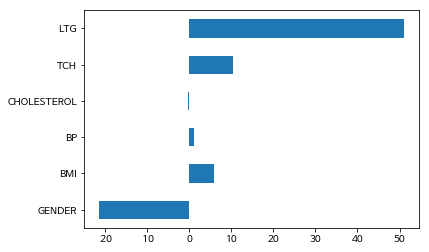

In [300]:
# STEP 6. 최종도출
df_reg_coef = pd.DataFrame({"Coef":reg_multi_rfe_results.params.values[1:]},index = reg_multi_rfe_model.exog_names[1:])
df_reg_coef.plot.barh(y = "Coef",legend = False)


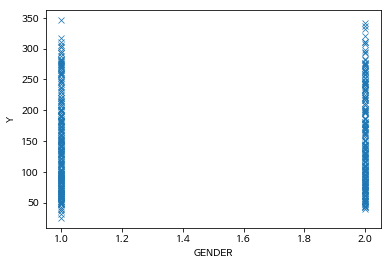

In [301]:
scatter_g('GENDER')


C:\Users\znzla\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([15.95022624,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , 14.04977376]),
 array([1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
        1.16666667, 1.2       , 1.23333333, 1.26666667, 1.3       ,
        1.33333333, 1.36666667, 1.4       , 1.43333333, 1.46666667,
        1.5       , 1.53333333, 1.56666667, 1.6       , 1.63333333,
        1.66666667, 1.7       , 1.73333333, 1.76666667, 1.8       ,
        1.83333333, 1.86666667, 1.9       , 1.93333333, 1.96666667,
        2.        ]),
 <a list of 30 Patch objects>)

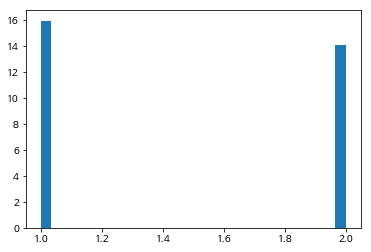

In [302]:
x = df_diabete_x.GENDER
plt.hist(x,normed=True,bins=30)


C:\Users\znzla\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


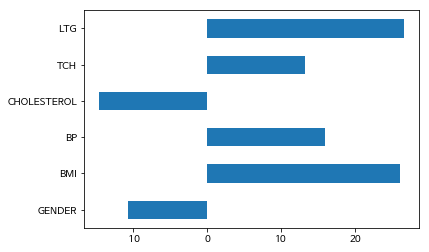

In [304]:
# 표준화 회귀계수를 이용한 변수 중요도 확인
# 왜냐하면, 변수간에도 중요도 차이가 있다. - 표준화(scaling 필요)

df_diabete_x_scaled = scale(df_diabete_x_const[selected_cols])

df_diabete_x_scaled = sm.add_constant(df_diabete_x_scaled)

reg_multi_scaled_model = sm.OLS(df_diabete_y,df_diabete_x_scaled)

reg_multi_scaled_results = reg_multi_scaled_model.fit()

# 회귀계수의 방향은 동일하나 중요도의 크기가 변함 
df_reg_scaled_coef = pd.DataFrame({"Coef":reg_multi_scaled_results.params.values[1:]},
index = reg_multi_rfe_model.exog_names[1:])
df_reg_scaled_coef.plot.barh(y="Coef", legend = False)


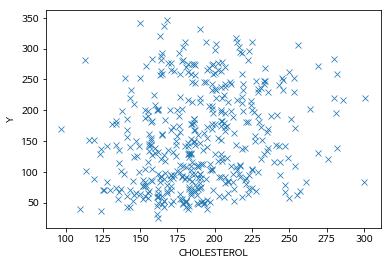

In [305]:
scatter_g('CHOLESTEROL')


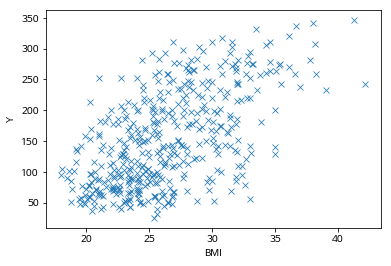

In [306]:
scatter_g('BMI')


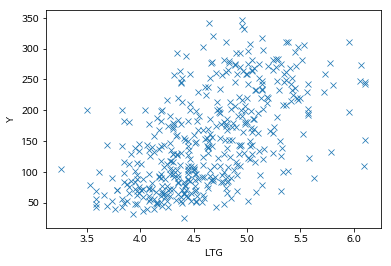

In [307]:
scatter_g('LTG')


In [308]:
# 최종 회귀계수도출
# formula 함수를 적용
# 설명변수= GENDER,BMI,BP,CHOLESTEROL,TCH,LTG
import statsmodels.formula.api as smf
formula_model = smf.ols(formula = "Y~ GENDER + BP + CHOLESTEROL + TCH + BMI + LTG " , data = df_diabete)
formula_result = formula_model.fit()
print(formula_result.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     76.51
Date:                Thu, 14 Feb 2019   Prob (F-statistic):           5.71e-65
Time:                        01:36:02   Log-Likelihood:                -2388.0
No. Observations:                 442   AIC:                             4790.
Df Residuals:                     435   BIC:                             4819.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -279.9995     27.941    -10.021      

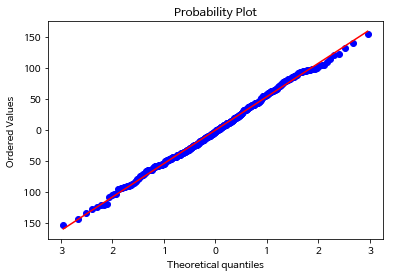

In [309]:
# 정규화(잔차검정)
# 정규성확인
stats.probplot(formula_result.resid, plot=plt)
plt.show()
